<a href="https://colab.research.google.com/github/G0rav/Human_Activity_Recognition/blob/main/MHealth_Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://archive.ics.uci.edu/ml/datasets/mhealth+dataset

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext tensorboard

# Fetching Datasets

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
!unzip MHEALTHDATASET.zip

--2021-02-11 17:42:46--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75567983 (72M) [application/x-httpd-php]
Saving to: ‘MHEALTHDATASET.zip’

MHEALTHDATASET.zip  100%[===================>]  72.07M  18.6MB/s    in 4.4s    

2021-02-11 17:42:51 (16.3 MB/s) - ‘MHEALTHDATASET.zip’ saved [75567983/75567983]

Archive:  MHEALTHDATASET.zip
   creating: MHEALTHDATASET/
  inflating: MHEALTHDATASET/mHealth_subject1.log  
  inflating: MHEALTHDATASET/mHealth_subject10.log  
  inflating: MHEALTHDATASET/mHealth_subject2.log  
  inflating: MHEALTHDATASET/mHealth_subject3.log  
  inflating: MHEALTHDATASET/mHealth_subject4.log  
  inflating: MHEALTHDATASET/mHealth_subject5.log  
  inflating: MHEALTHDATASET/mHealth_subject6.log  
  inflating: MHEALTHDATASE

In [3]:
! cat MHEALTHDATASET/README.txt


*************************************************** mHealth dataset **********************************************************

Authors: Oresti Ba�os, Rafael Garcia, Alejandro Saez
Date: 22/10/2013
Institution: University of Granada (UGR) 
Department: Department of Computer Architecture and Computer Technology.
Contact: oresti@ugr.es (oresti.bl@gmail.com)

---------------------------------------------------------------------------------------------------------------------------------------------
NOTE: if you use this dataset please cite the following work

Banos, O., Garcia, R., Holgado-Terriza, J.A., Damas, M., Pomares, H., Rojas, I., Saez, A., Villalonga, C.: 
mHealthDroid: a novel framework for agile development of mobile health applications. 
In: Proceedings of the 6th International Work-conference on Ambient Assisted Living an Active Ageing (IWAAL 2014), Belfast, United Kingdom, December 2-5 (2014)

Insightful figures and descriptions are presented within this work.
-------------

In [4]:
os.listdir('MHEALTHDATASET/')

['mHealth_subject5.log',
 'mHealth_subject1.log',
 'mHealth_subject10.log',
 'mHealth_subject9.log',
 'mHealth_subject2.log',
 'mHealth_subject8.log',
 'mHealth_subject7.log',
 'mHealth_subject4.log',
 'README.txt',
 'mHealth_subject3.log',
 'mHealth_subject6.log']

In [5]:
for i in os.listdir('MHEALTHDATASET/'):
  if i not in ('README.txt'):
    print(i)

mHealth_subject5.log
mHealth_subject1.log
mHealth_subject10.log
mHealth_subject9.log
mHealth_subject2.log
mHealth_subject8.log
mHealth_subject7.log
mHealth_subject4.log
mHealth_subject3.log
mHealth_subject6.log


In [90]:
df = pd.read_csv('MHEALTHDATASET/mHealth_subject1.log', header=None, sep='\t')
df = df.loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]]
df = df.rename(columns={
    5:"alx", 6:"aly", 7:"alz", 8:"glx", 9:"gly", 10:"glz", 14:"arx",15:"ary", 16:"arz", 17:"grx", 18:"gry", 19:"grz", 23:"Activity"
    })
df

alx     aly      alz       glx  ...      grx      gry       grz  Activity
0       2.1849 -9.6967  0.63077  0.103900  ... -0.44902 -1.01030  0.034483         0
1       2.3876 -9.5080  0.68389  0.085343  ... -0.44902 -1.01030  0.034483         0
2       2.4086 -9.5674  0.68113  0.085343  ... -0.44902 -1.01030  0.034483         0
3       2.1814 -9.4301  0.55031  0.085343  ... -0.45686 -1.00820  0.025862         0
4       2.4173 -9.3889  0.71098  0.085343  ... -0.45686 -1.00820  0.025862         0
...        ...     ...      ...       ...  ...      ...      ...       ...       ...
161275  2.1463 -9.2841  2.28640 -0.888680  ... -0.65490  0.54415  0.676720         0
161276  2.0773 -9.5717  2.24010 -0.903530  ... -0.65490  0.54415  0.676720         0
161277  1.7497 -9.3127  2.39560 -0.903530  ... -0.65490  0.54415  0.676720         0
161278  1.8910 -9.3342  2.21890 -0.903530  ... -0.65490  0.54415  0.676720         0
161279  2.3099 -9.2537  2.35210 -0.909090  ... -0.65490  0.54415  0.676720         0

[161280 rows x 13 columns]

In [7]:
'''
frequency - 50Hz
L0: Nothing
L1: Standing still (1 min) 
L2: Sitting and relaxing (1 min) 
L3: Lying down (1 min) 
L4: Walking (1 min) 
L5: Climbing stairs (1 min) 
L6: Waist bends forward (20x) 
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)
'''
df.Activity.value_counts()

0     126106
8       3379
11      3072
10      3072
9       3072
7       3072
6       3072
5       3072
4       3072
3       3072
2       3072
1       3072
12      1075
Name: Activity, dtype: int64

In [91]:
def plot_comparison(data, metric = 'acceleration'):

  metric = metric[0].lower()
  data = data

  for i in range(1,13):
    plt.figure(figsize=(16,4))

    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(metric+'lx'+str(i))
    plt.legend()  

    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(metric+'rx'+str(i))
    plt.legend() 

    plt.show()
    print()

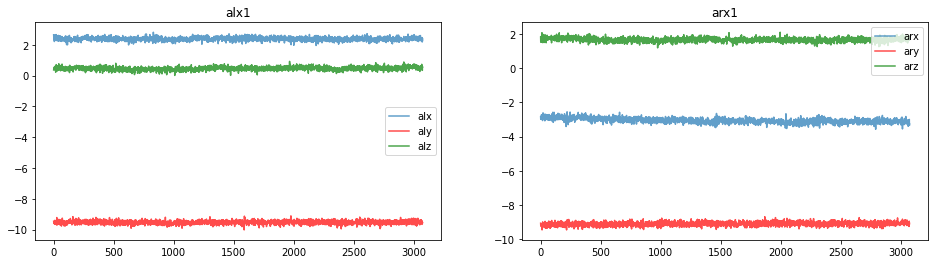

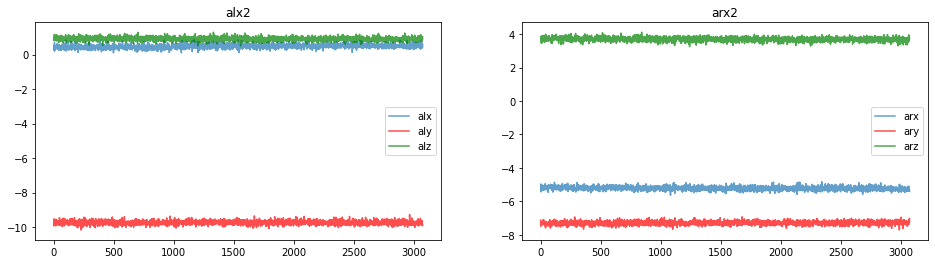

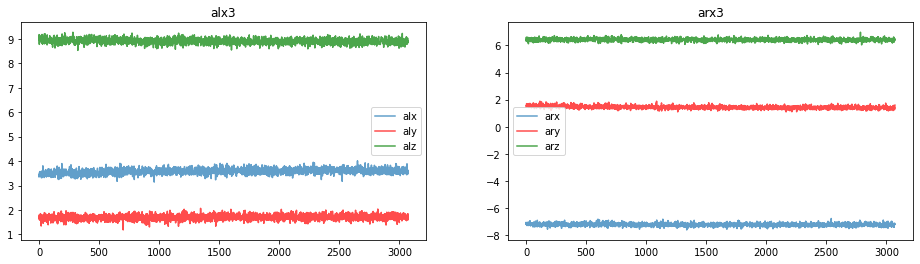

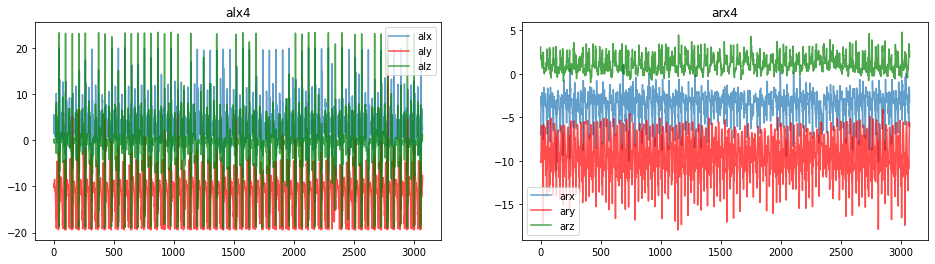

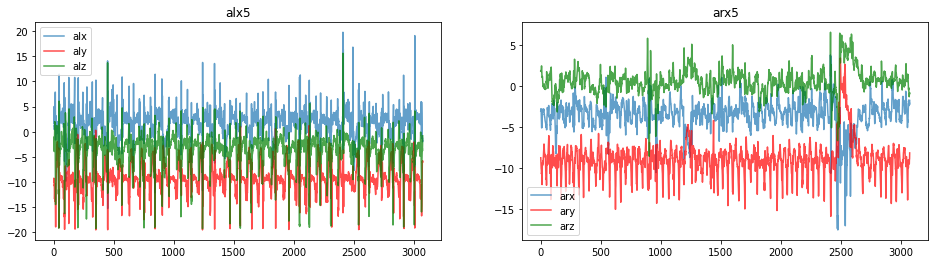

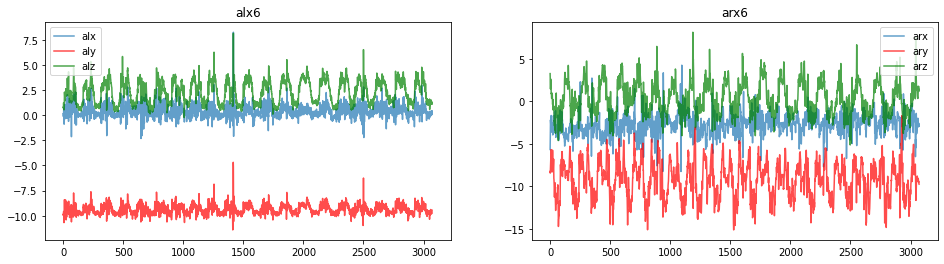

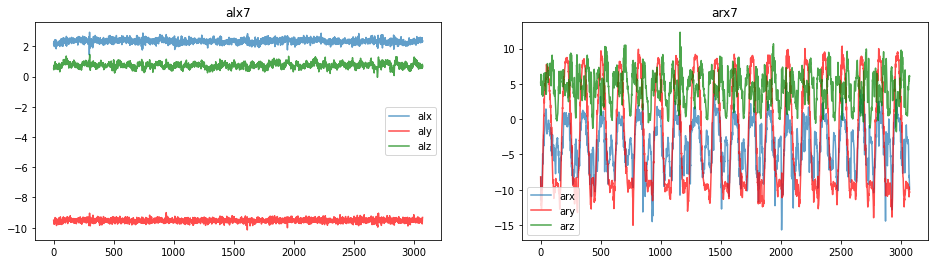

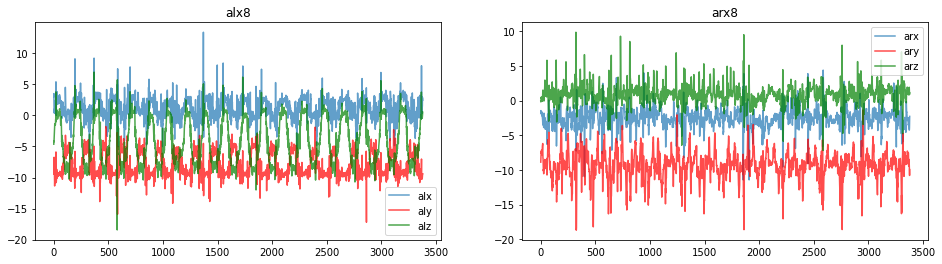

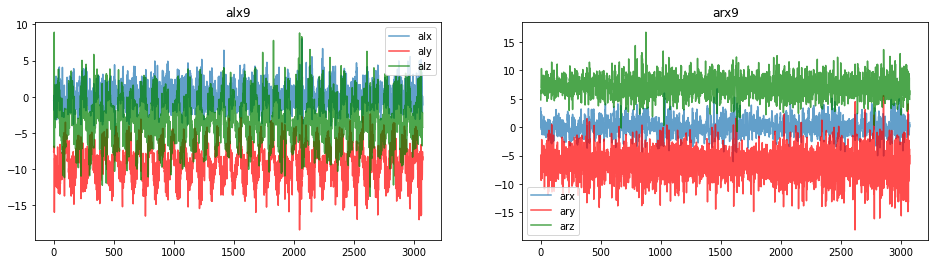

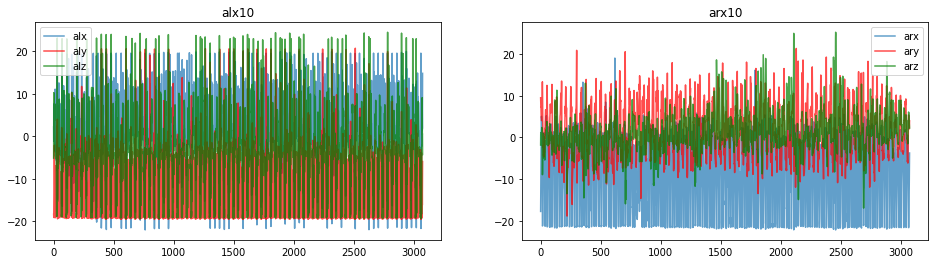

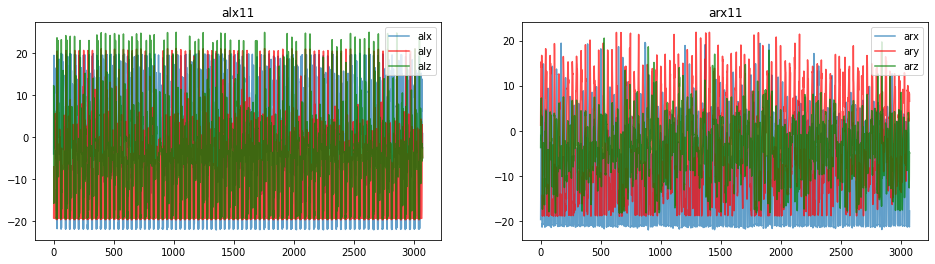

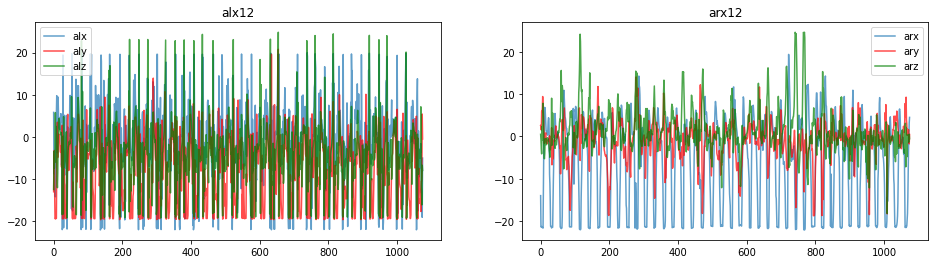

In [92]:
plot_comparison(df,'acceleration')

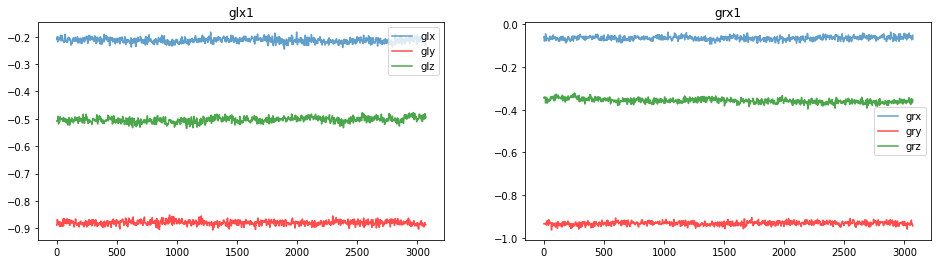

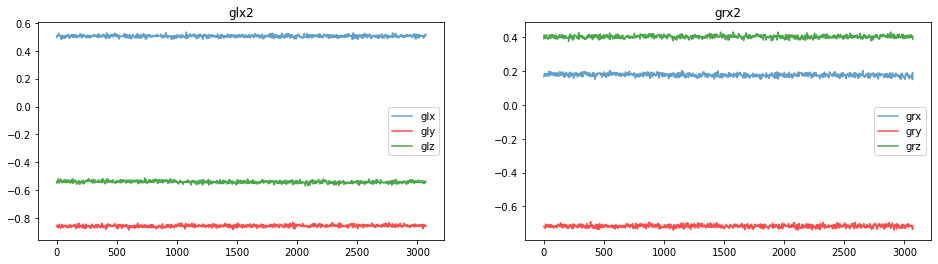

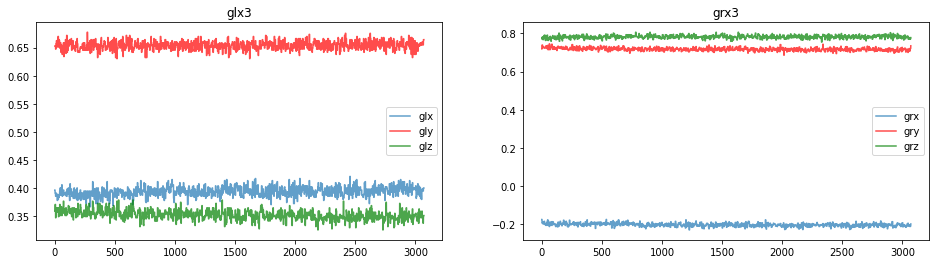

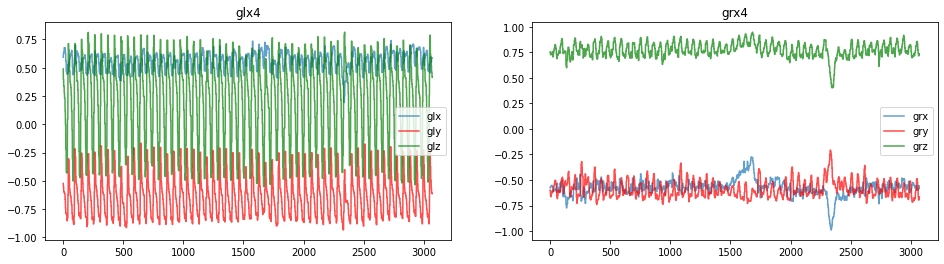

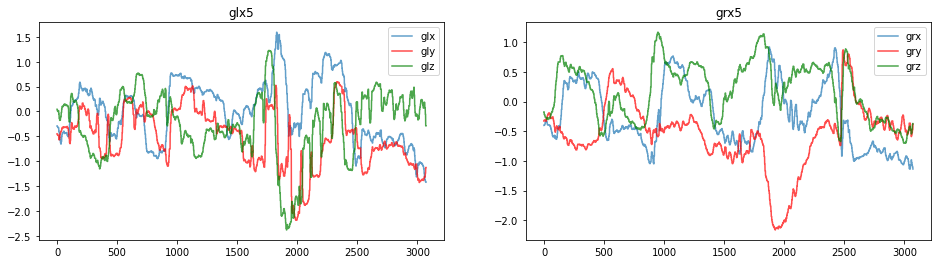

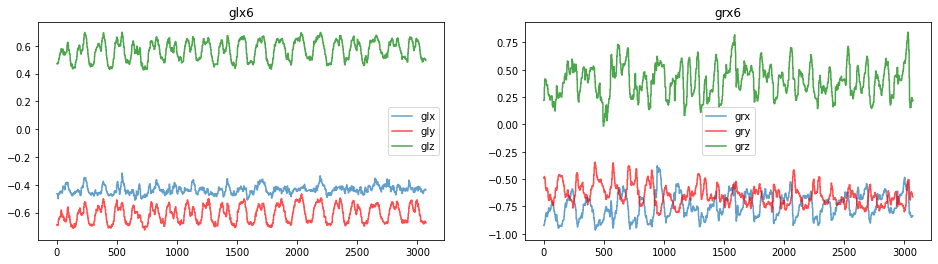

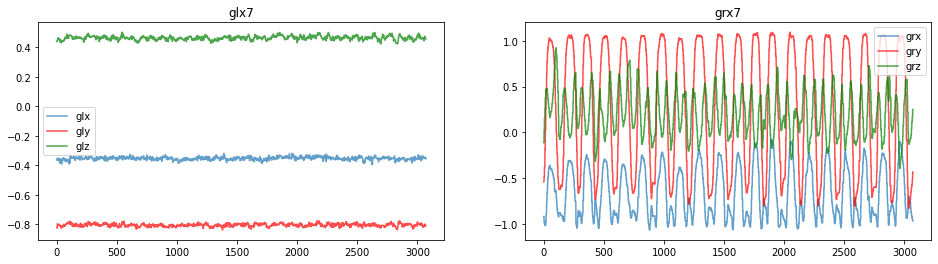

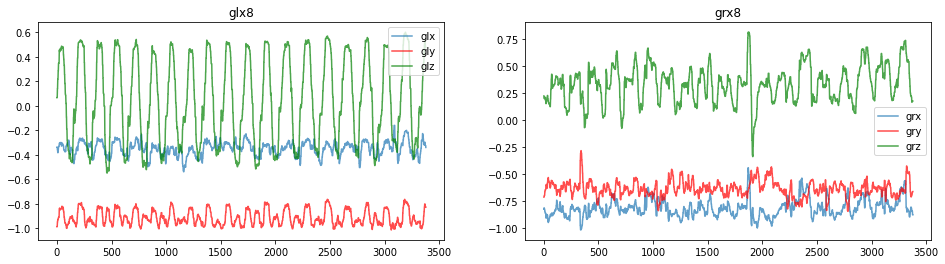

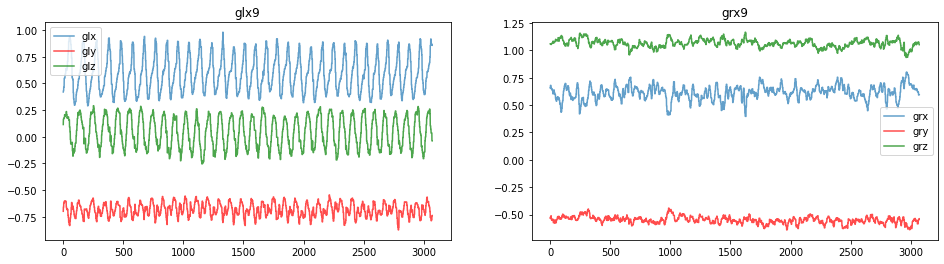

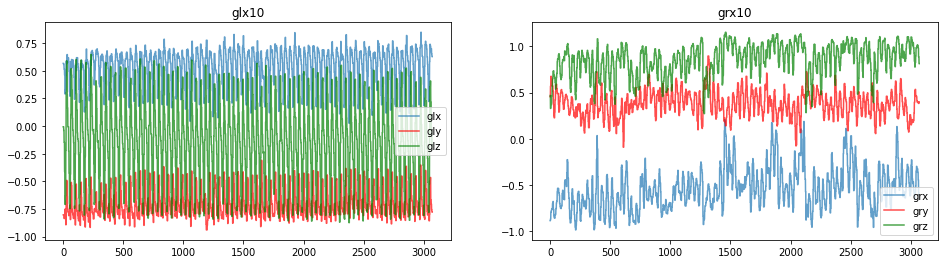

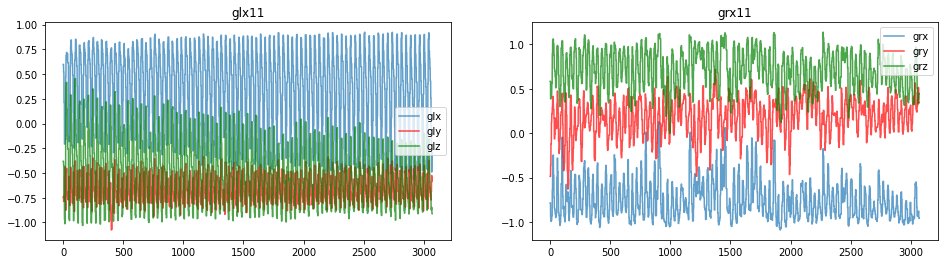

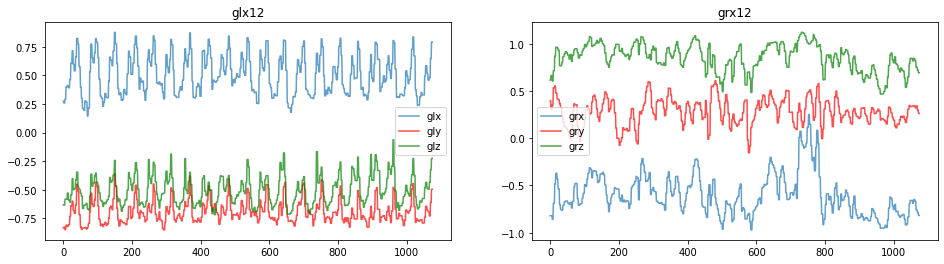

In [93]:
plot_comparison(df,'gyroscope')

# EDA

In [94]:
df = pd.DataFrame()

for i in range(1,11):
    df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    df1 = df1.loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]]
    df1 = df1.rename(columns={
        5:"alx", 6:"aly", 7:"alz", 8:"glx", 9:"gly", 10:"glz", 14:"arx",15:"ary", 16:"arz", 17:"grx", 18:"gry", 19:"grz", 23:"Activity"
        })
    df1['subject'] = 'subject'+str(i)
    df = pd.concat([df,df1])


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215745 entries, 0 to 98303
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 139.1+ MB


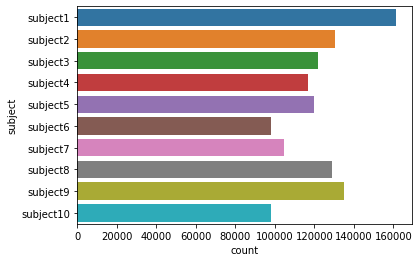

In [113]:
sns.countplot(y='subject',data=df)
plt.show()

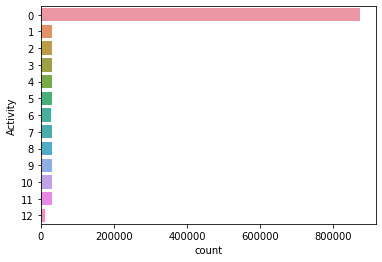

In [114]:
sns.countplot(y='Activity',data=df)

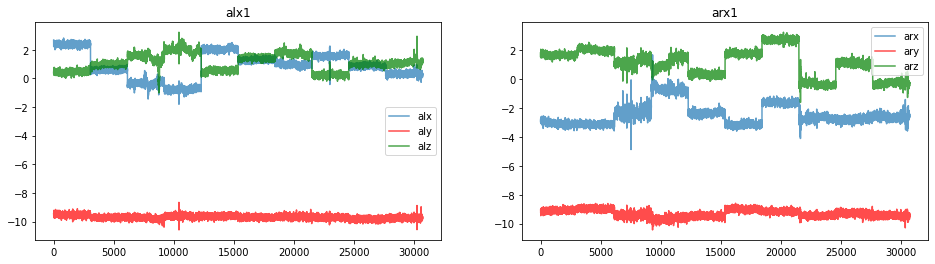

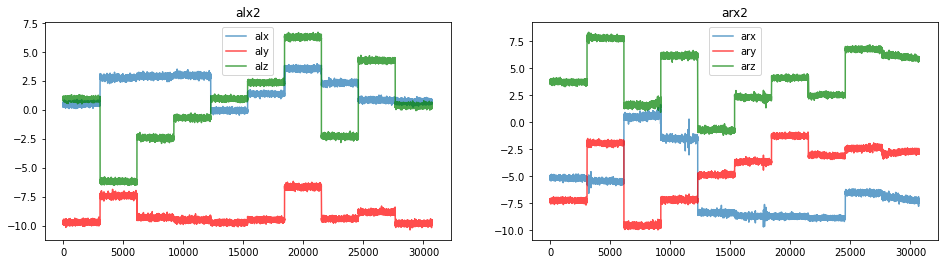

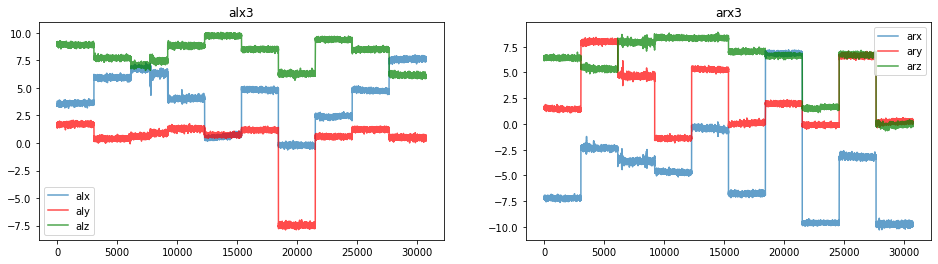

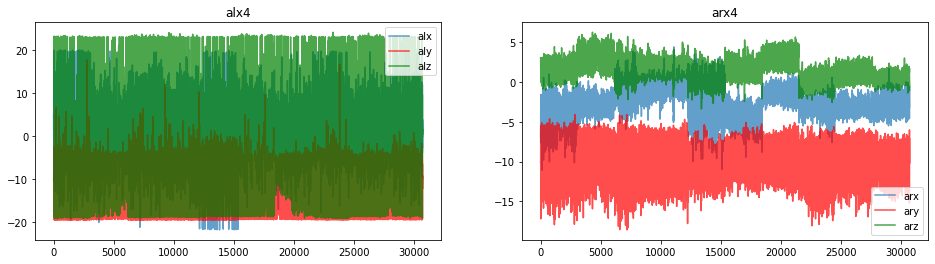

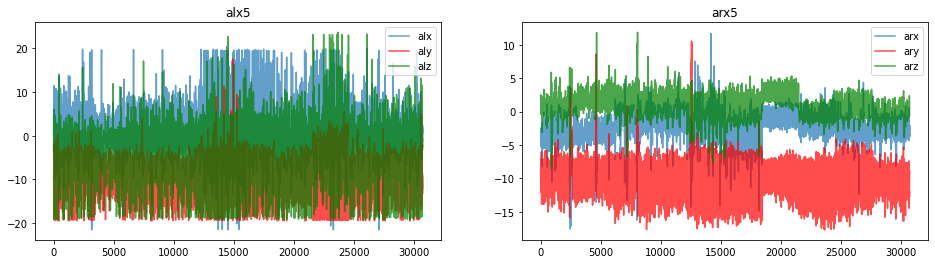

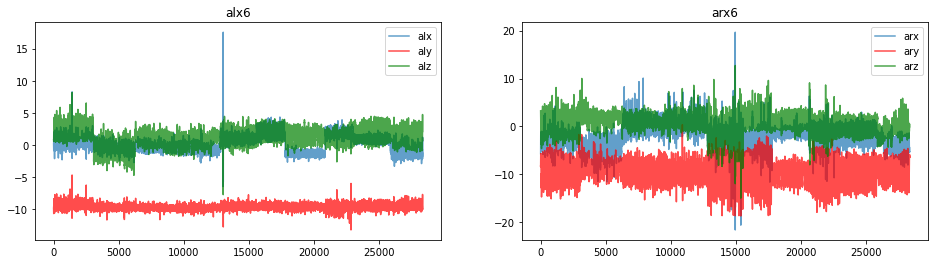

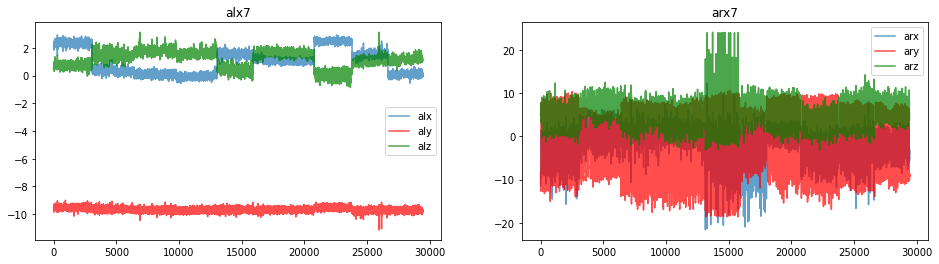

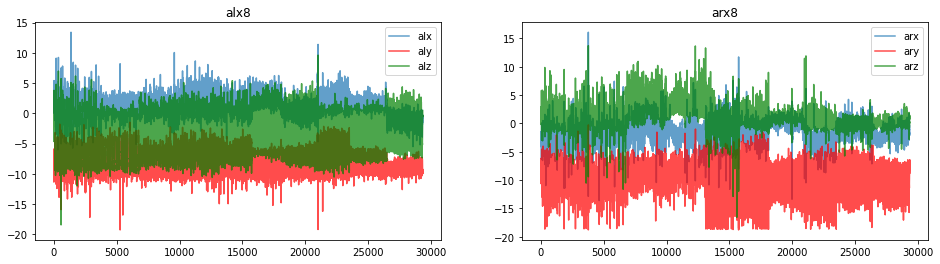

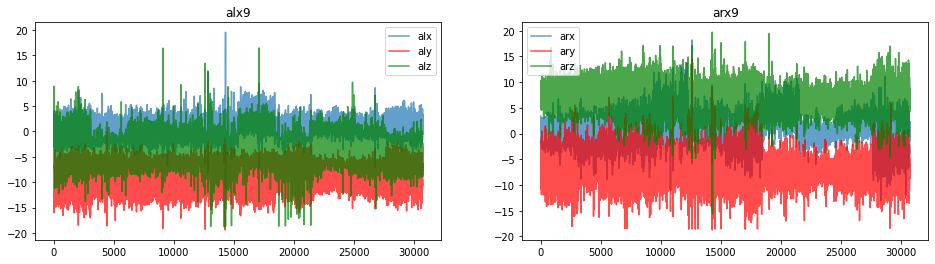

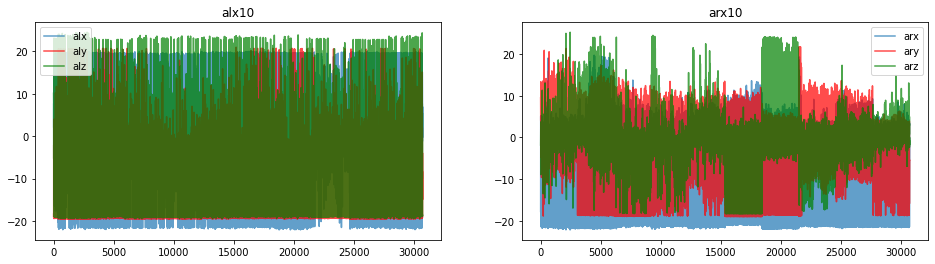

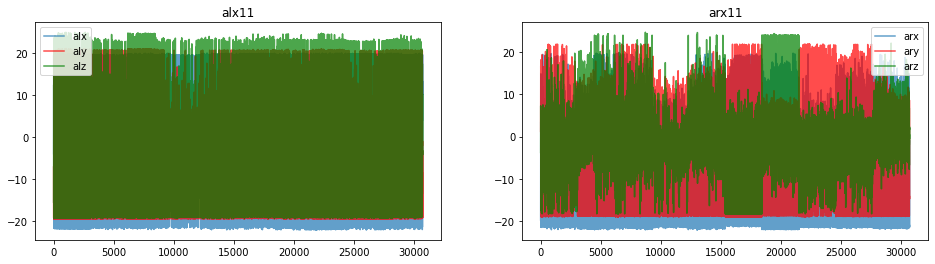

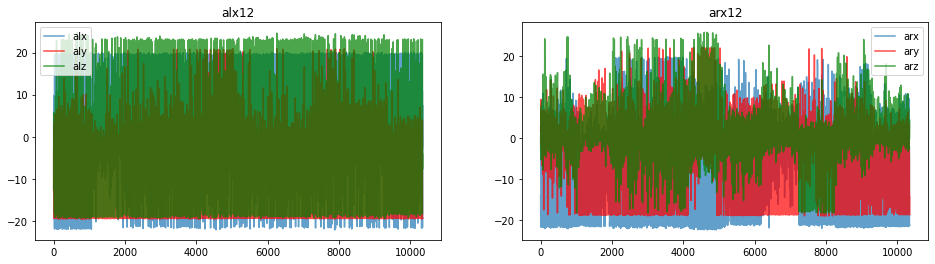

In [97]:
plot_comparison(df)

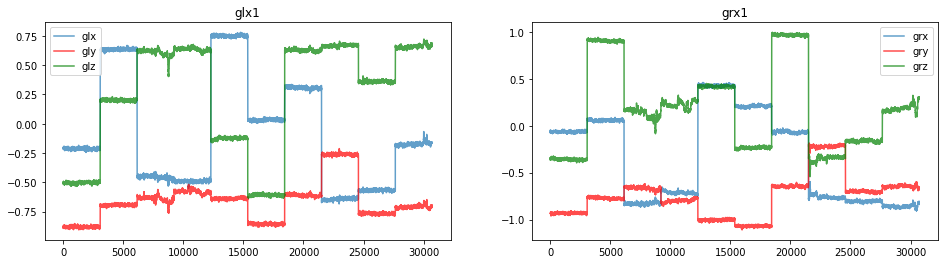

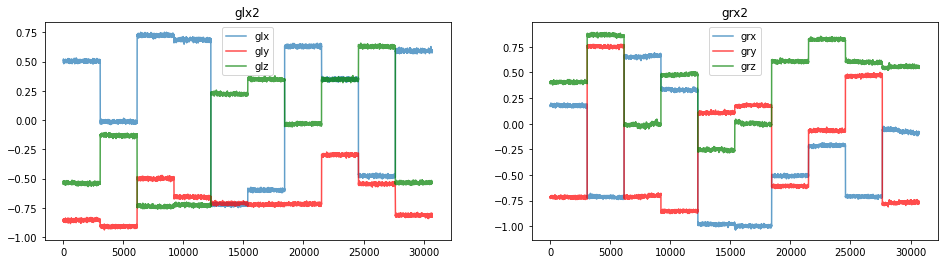

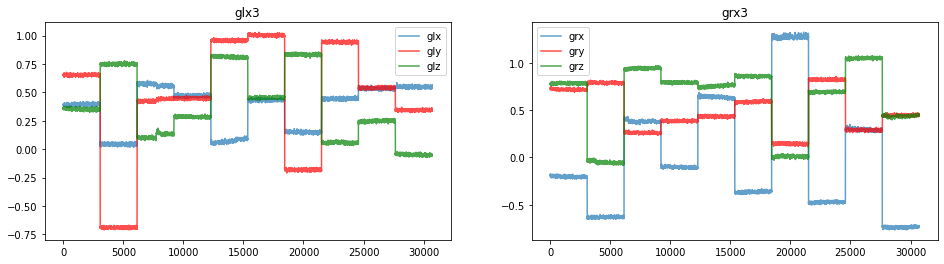

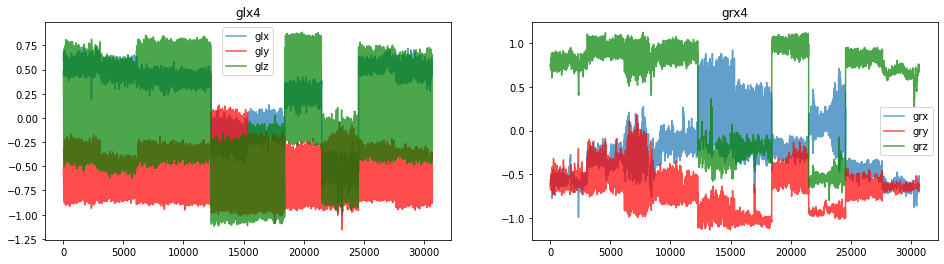

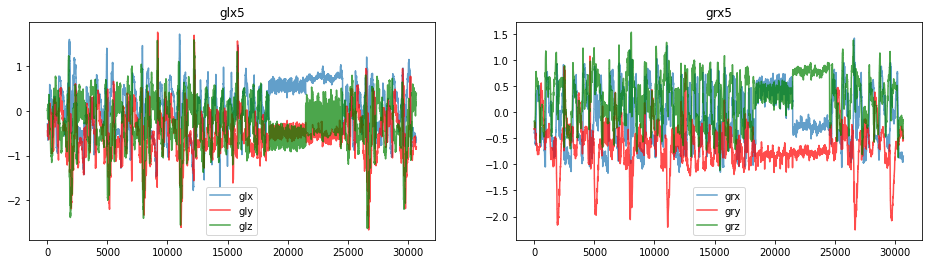

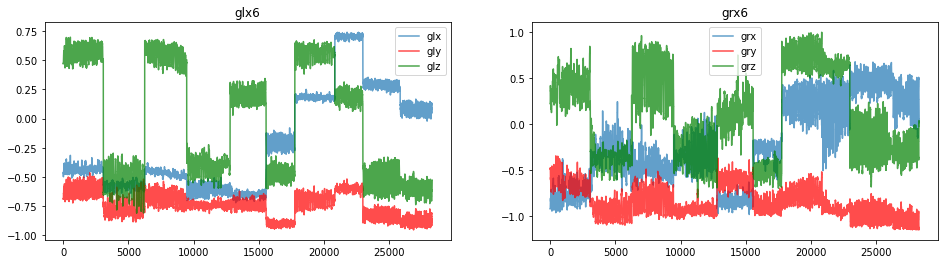

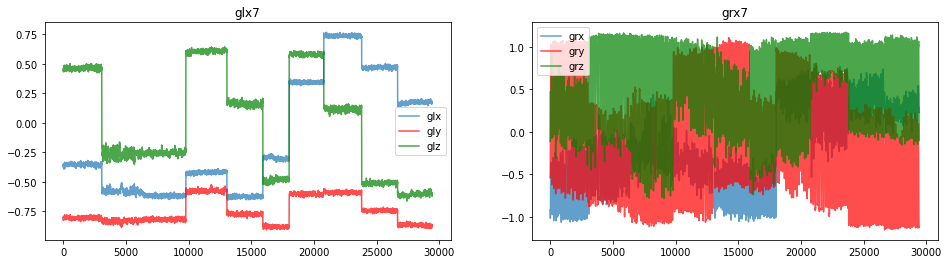

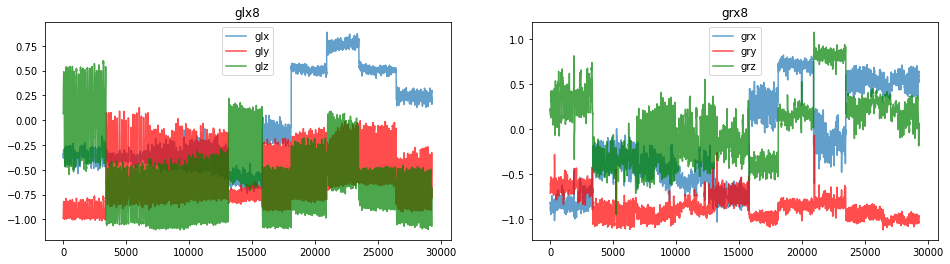

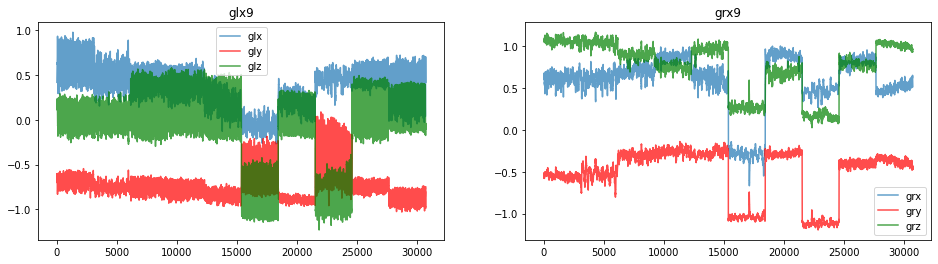

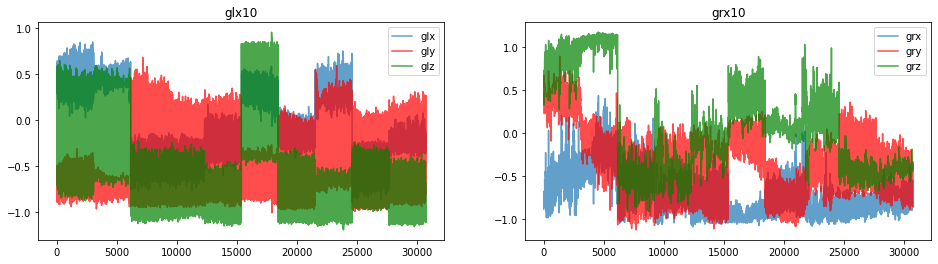

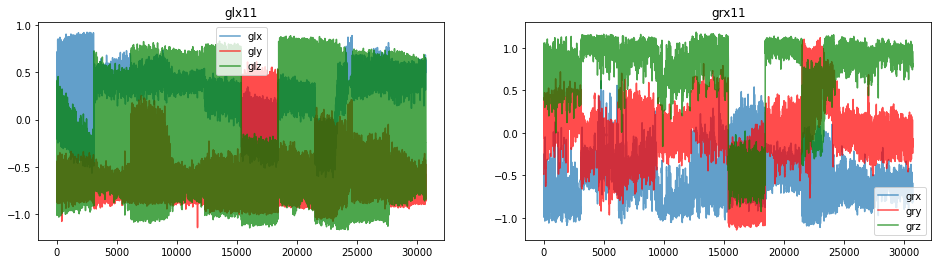

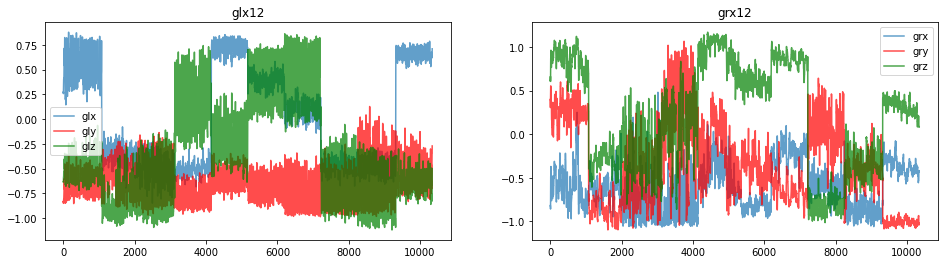

In [98]:
plot_comparison(df,'gyroscope')